In [1]:
# https://github.com/Rafael1s/Deep-Reinforcement-Learning-Algorithms/tree/master/Cartpole-Deep-Q-Learning

In [2]:
import torch
import gym

import numpy as np
import matplotlib.pyplot as plt


In [3]:
env_id = 'CartPole-v1'
env_id = 'CartPole-v0'
env = gym.make(env_id)
n_actions = env.action_space.n
len_obs_space = env.observation_space.shape[0]

print('n_actions = {}'.format(n_actions))
print('len_obs_space = {}'.format(len_obs_space))
# torch.manual_seed(1423)
# if gpu is to be used
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

n_actions = 2
len_obs_space = 4


In [4]:
from dqn import DQNv2 as DQN
from dqn_agent2 import DQNAgent

In [5]:
gamma = 0.99
epsilon = 1
learning_rate = 0.001
EPISODES = 10000
MINI_BATCH_SIZE = 64
MEMORY_SIZE = 10000
# EPISODES = 100
rewards = []
loss_list = []
epsilon_list = []
layer_sizes = [len_obs_space, 16, n_actions]
q_approx = DQN(lr=learning_rate, layer_sizes=layer_sizes, device=device).to(device)

agent = DQNAgent(q_approx, env, epsilon, gamma, MINI_BATCH_SIZE,
              MEMORY_SIZE, learning_rate)

# reset replay memory

avg_scores = agent.train(EPISODES=EPISODES, is_progress=True)
# total_rewards = np.sum(rewards[0, 0,:])
rewards = np.array(agent.rewards)
print(rewards.shape)
# print("Score over time: {}, gamma={}".format(total_rewards/EPISODES, gamma))


 14%|█▍        | 1411/10000 [04:39<28:19,  5.05it/s]


 Environment solved in 1411 episodes!	Average Score: 195.04
(1412,)


length of scores:  1412 , len of avg_scores:  1412


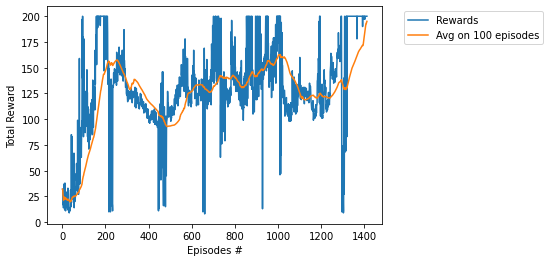

In [6]:
print('length of scores: ', len(rewards), ', len of avg_scores: ', len(avg_scores))

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(rewards)+1), rewards, label="Rewards")
plt.plot(np.arange(1, len(avg_scores)+1), avg_scores, label="Avg on 100 episodes")
plt.legend(bbox_to_anchor=(1.05, 1)) 
plt.ylabel('Total Reward')
plt.xlabel('Episodes #')
plt.show()

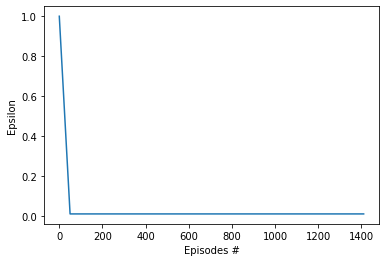

In [7]:
plt.plot(agent.epsilon_list)
plt.ylabel('Epsilon')
plt.xlabel('Episodes #')
plt.show()

In [8]:
BASE_PATH = "./dqnv2_models/"
# save model
model_info = str(learning_rate)+ '_' + str(gamma)
path = BASE_PATH + 'model' + '_' + model_info + '.pt'
q_name = 'q_approx_state_dict_' + model_info

agent.save_q_model(path)

100%|██████████| 100/100 [00:02<00:00, 43.47it/s]


average reward per episode : 200.0
average reward per episode= 200.0


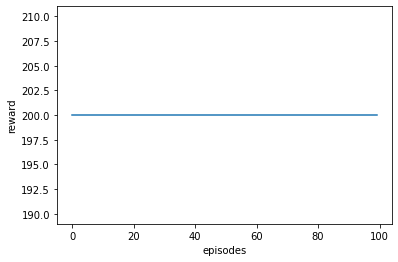

In [9]:
from tqdm import tqdm
from time import sleep
# load model
env = gym.make('CartPole-v0')
# env = gym.make('CartPole-v1')


len_obs_space = env.observation_space.shape[0]
n_actions = env.action_space.n

layer_sizes = [len_obs_space, 16, n_actions]
epsilon = 0
q_approx = DQN(lr=learning_rate, layer_sizes=layer_sizes, device=device).to(device)
agent = DQNAgent(q_approx, env, epsilon, gamma, MINI_BATCH_SIZE,
              MEMORY_SIZE, learning_rate)

PATH = './dqnv2_models/model_0.001_0.99.pt'
agent.load_q_model(PATH)

reward_arr = []
for i in tqdm(range(100)):
    obs, done, rew = env.reset(), False, 0
    while not done:
        A = agent.get_action(obs)
        obs, reward, done, info = env.step(A.item())
        rew += reward
        # sleep(0.01)
        # env.render()

    reward_arr.append(rew)
env.close()
print("average reward per episode :", sum(reward_arr) / len(reward_arr))

import numpy as np
import matplotlib.pyplot as plt

rewards = np.array(reward_arr)
plt.plot(rewards)
plt.xlabel('episodes')
plt.ylabel('reward')
print('average reward per episode= {}'.format(np.mean(rewards)))
plt.show()